In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("IRIS.csv")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.size

750

In [10]:
df.shape

(150, 5)

In [12]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [13]:
class_counts = df['species'].value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Box Plots

C:\Users\sivak\AppData\Local\Temp\ipykernel_6980\104556284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\sivak\AppData\Local\Temp\ipykernel_6980\104556284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\sivak\AppData\Local\Temp\ipykernel_6980\104556284.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\sivak\AppData\Local\Temp\ipykernel_6980\104556284.py:9: Futur

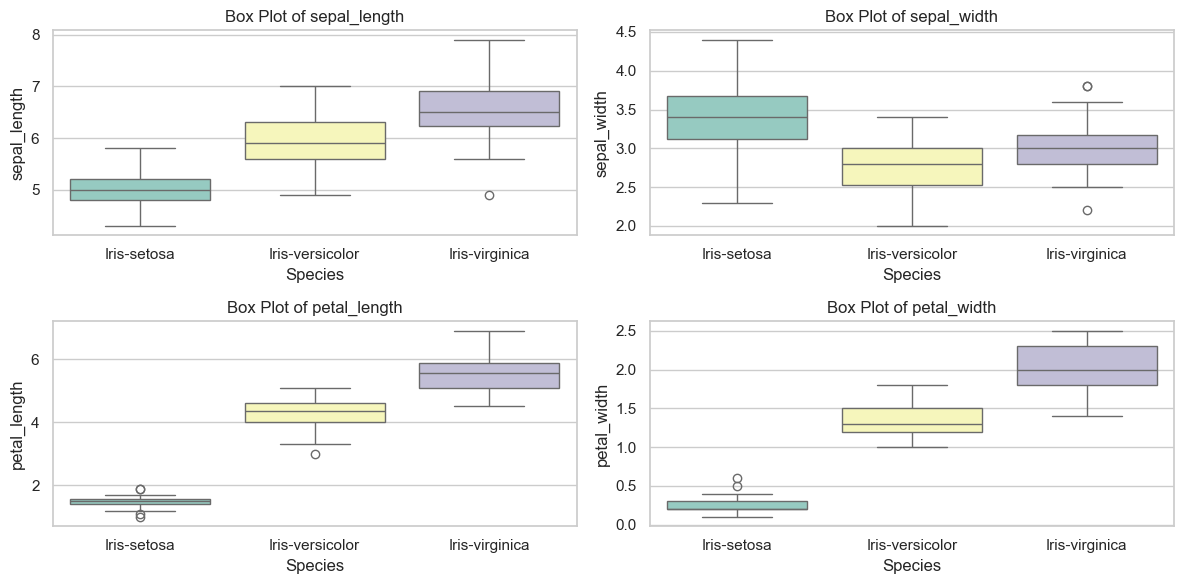

In [15]:
# Box plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, column in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df, palette='Set3')

    plt.title(f'Box Plot of {column}')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [16]:
setosa_quantiles = df[df['species'] == 'Iris-setosa']['petal_length'].quantile([0.05, 0.95])
print(setosa_quantiles)

0.05    1.2
0.95    1.7
Name: petal_length, dtype: float64


C:\Users\sivak\AppData\Local\Temp\ipykernel_6980\1433772278.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\sivak\AppData\Local\Temp\ipykernel_6980\1433772278.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\sivak\AppData\Local\Temp\ipykernel_6980\1433772278.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=df, palette='Set3')
C:\Users\sivak\AppData\Local\Temp\ipykernel_6980\1433772278.py:2

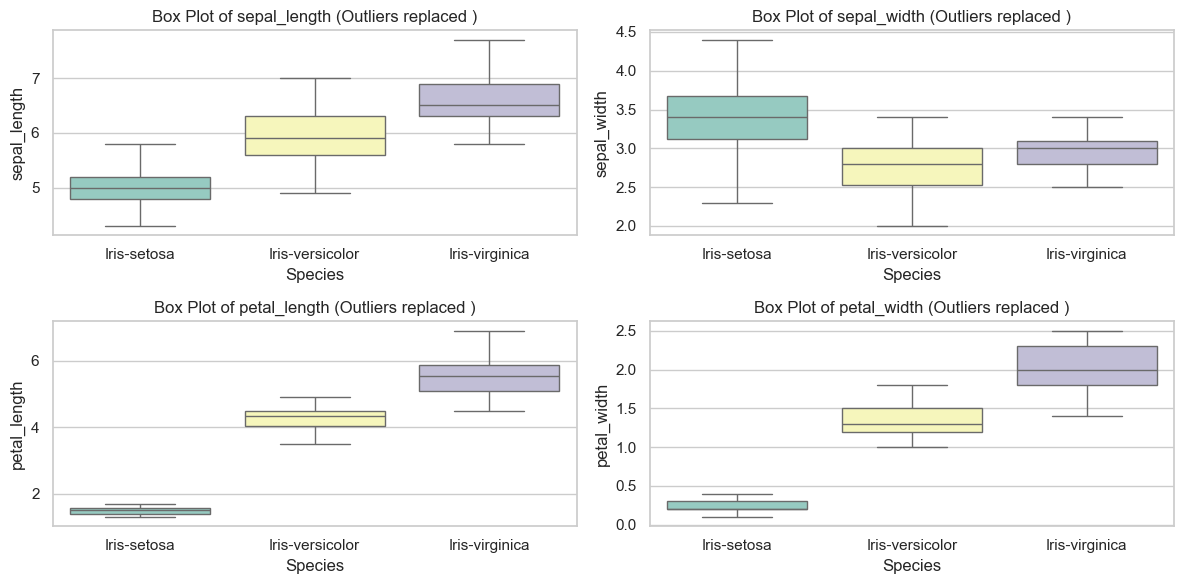

In [17]:
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species_with_outliers = {'Iris-setosa': ['petal_length', 'petal_width'],
                        'Iris-versicolor': ['petal_length'],
                        'Iris-virginica': ['sepal_length', 'sepal_width']}

# Winsorize values for 'Iris-setosa' and 'petal_length'
df.loc[(df['species'] == 'Iris-setosa') & (df['petal_length'] < 1.3), 'petal_length'] = 1.3
df.loc[(df['species'] == 'Iris-setosa') & (df['petal_length'] > 1.7), 'petal_length'] = 1.7

# Find and replace outliers with median for specific species and attributes
for species, outlier_columns in species_with_outliers.items():
    for column in outlier_columns:
        q_low = df[df['species'] == species][column].quantile(0.05)
        q_high = df[df['species'] == species][column].quantile(0.95)

        # Replace outliers with median
        median_value = df[df['species'] == species][column].median()
        df.loc[(df['species'] == species) & ((df[column] < q_low) | (df[column] > q_high)), column] = median_value

# Box plots for each attribute with 'species' as hue after handling outliers
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for i, column in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df, palette='Set3')

    plt.title(f'Box Plot of {column} (Outliers replaced )')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [19]:
x = df.drop(columns=df.columns[-1])
x.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### K-Means Clustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


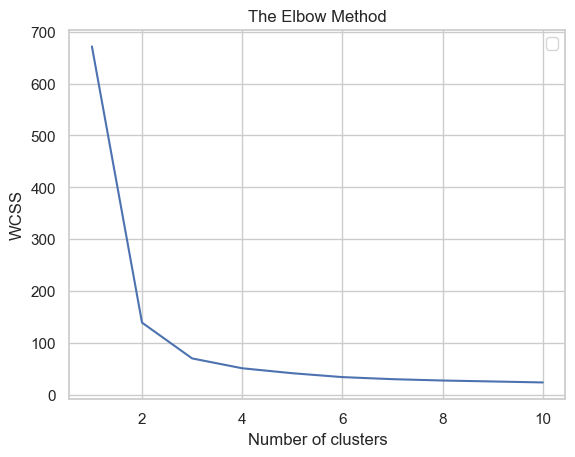

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

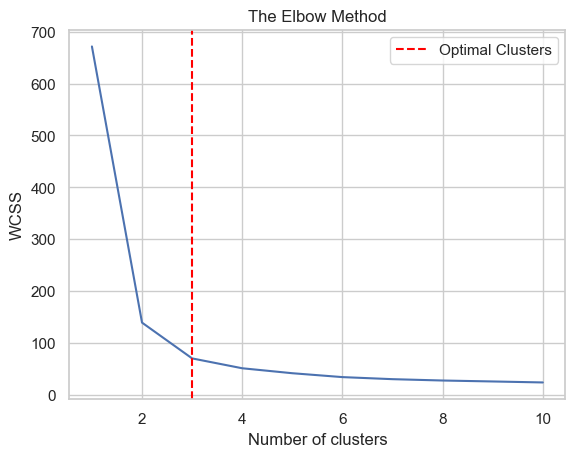

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.axvline(x=3, color='red', linestyle='--', label='Optimal Clusters')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

### Clusterings

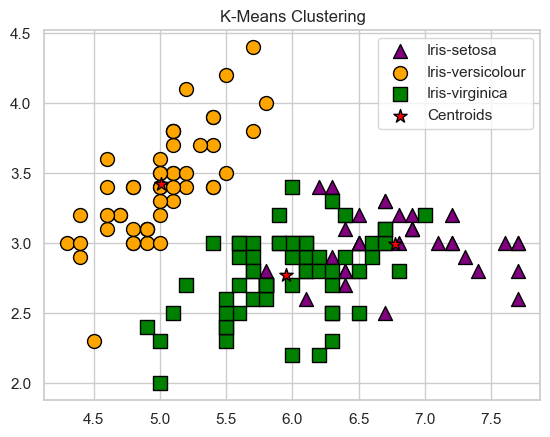

In [23]:
plt.scatter(x.iloc[y_kmeans == 0, 0], x.iloc[y_kmeans == 0, 1], s=100, c='purple', marker='^', label='Iris-setosa', edgecolors='black')
plt.scatter(x.iloc[y_kmeans == 1, 0], x.iloc[y_kmeans == 1, 1], s=100, c='orange', marker='o', label='Iris-versicolour', edgecolors='black')
plt.scatter(x.iloc[y_kmeans == 2, 0], x.iloc[y_kmeans == 2, 1], s=100, c='green', marker='s', label='Iris-virginica', edgecolors='black')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='*', label='Centroids', edgecolors='black')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

### Hierarchical Clustering

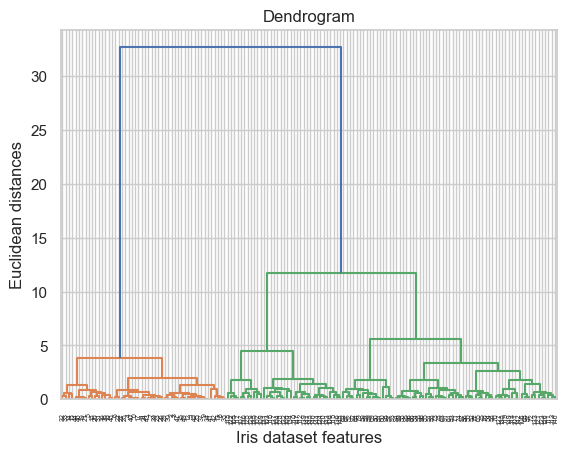

In [24]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Iris dataset features')
plt.ylabel('Euclidean distances')
plt.show()

### Data Training

In [25]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
y_hc = hc.fit_predict(x)

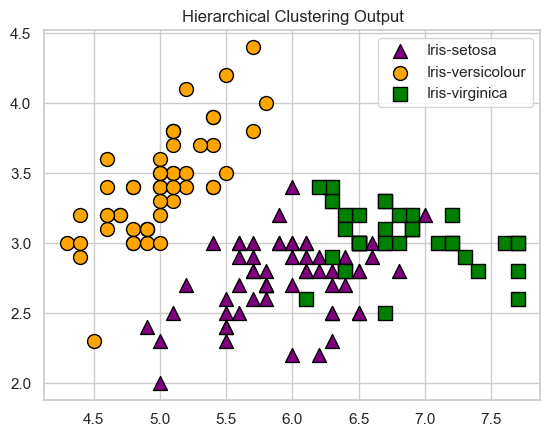

In [26]:
plt.scatter(x.iloc[y_hc == 0, 0], x.iloc[y_hc == 0, 1], s=100, c='purple', marker='^', label='Iris-setosa', edgecolors='black')
plt.scatter(x.iloc[y_hc == 1, 0], x.iloc[y_hc == 1, 1], s=100, c='orange', marker='o', label='Iris-versicolour', edgecolors='black')
plt.scatter(x.iloc[y_hc == 2, 0], x.iloc[y_hc == 2, 1], s=100, c='green', marker='s', label='Iris-virginica', edgecolors='black')
plt.title('Hierarchical Clustering Output')
plt.legend()
plt.show()

### Gaussian Mixture Model

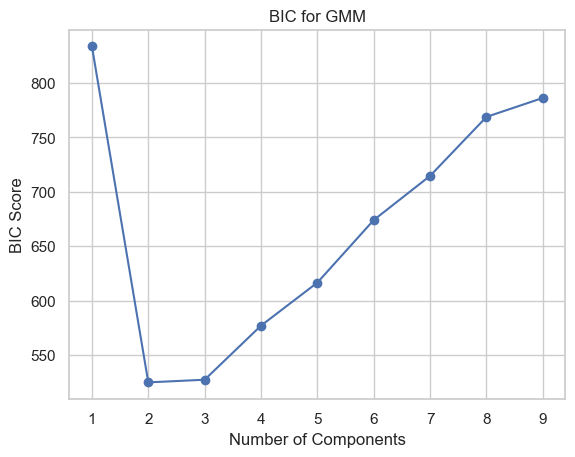

In [27]:
n_components = range(1, 10)

bic = []
for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(x)
    bic.append(gmm.bic(x))

# Plot the BIC values
plt.plot(n_components, bic, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC for GMM')
plt.show()

### GMM Model

In [28]:
gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm = gmm.fit_predict(x)

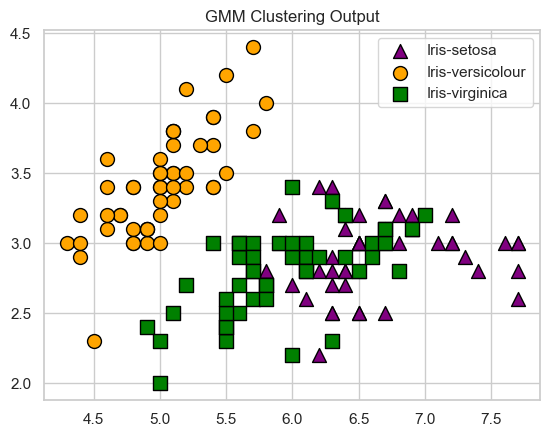

In [29]:
plt.scatter(x.iloc[y_gmm == 0, 0], x.iloc[y_gmm == 0, 1], s=100, c='purple', marker='^', label='Iris-setosa', edgecolors='black')
plt.scatter(x.iloc[y_gmm == 1, 0], x.iloc[y_gmm == 1, 1], s=100, c='orange', marker='o', label='Iris-versicolour', edgecolors='black')
plt.scatter(x.iloc[y_gmm == 2, 0], x.iloc[y_gmm == 2, 1], s=100, c='green', marker='s', label='Iris-virginica', edgecolors='black')
plt.title('GMM Clustering Output')
plt.legend()
plt.show()